#### Updating data

In [1]:
from utilities import *
from Reuters import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)

In [2]:
data = reutersScraper()

data.to_csv(PARENT_DIR + "/data/Reuters.csv", index=True)

-> Last page scraped: 8
-> Scraper |████████████████████████████████████████| 8/8 [100%] in 12.5s (0.64/s)                                      
-> 130 URLs fetched successfully!
-> Scraper |███████████████████████████████████████▍⚠︎ (!) 128/130 [98%] in 3:00.8 (0.71/s)                              
-> New data fetched successfully!


In [3]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-21,https://www.reuters.com/article/us-italy-polit...,"Mario Draghi resigns, plunging Italy into poli...",Italian President Sergio Mattarella dissolved...


#### LDA topic identification

In [4]:
doc_topic, topic_word, vocabulary = learn_topics(data, topicnum=30, vocabsize=10000, num_iter=2000) 

INFO:lda:n_documents: 11511
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 2164897
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -25914412
INFO:lda:<100> log likelihood: -17715854
INFO:lda:<200> log likelihood: -17603371
INFO:lda:<300> log likelihood: -17572024
INFO:lda:<400> log likelihood: -17561578
INFO:lda:<500> log likelihood: -17554463
INFO:lda:<600> log likelihood: -17548904
INFO:lda:<700> log likelihood: -17541689
INFO:lda:<800> log likelihood: -17542515
INFO:lda:<900> log likelihood: -17539095
INFO:lda:<1000> log likelihood: -17535394
INFO:lda:<1100> log likelihood: -17537889
INFO:lda:<1200> log likelihood: -17535608
INFO:lda:<1300> log likelihood: -17535542
INFO:lda:<1400> log likelihood: -17530356
INFO:lda:<1500> log likelihood: -17534052
INFO:lda:<1600> log likelihood: -17533207
INFO:lda:<1700> log likelihood: -17536664
INFO:lda:<1800> log likelihood: -17531759
INFO:lda:<1900> log likelihood: -17535659
INFO:lda:<1999> log likelihood: -17533585


In [5]:
topics = []
for i in range(len(data)):
    topics.append(doc_topic[i].argmax())

In [6]:
for i in range(10):
    print(f"{data.iloc[i][1]} TOPIC: {doc_topic[i].argmax()}")

Mario Draghi resigns, plunging Italy into political turmoil TOPIC: 22
In Syria, a poor wheat harvest adds to food worries TOPIC: 12
Biden stops short of declaring climate emergency, takes steps on wind power TOPIC: 26
Taiwan's concerns on speed of arms sales will be conveyed to US, says ex-US defence secretary TOPIC: 3
Italy's 'Super Mario' Draghi undone by political infighting TOPIC: 22
Explainer: Ukraine pushes for debt freeze to dodge hard default TOPIC: 2
Exclusive: Citi, Raiffeisen, other foreign banks seek staff in Russia as they struggle to exit TOPIC: 2
Russia's Polymetal to ramp up Asia sales as revenue slides TOPIC: 24
Anglo American sees higher annual diamond output amid robust demand TOPIC: 24
Russian gas flows to Europe resume via Nord Stream 1, eastbound Yamal flows rise TOPIC: 19


In [7]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


Topic 0: said russian media russia the information state
Topic 1: said covid vaccine the health sputnik russia
Topic 2: russia bank russian said rouble sanctions the
Topic 3: ukraine weapons military defence said the air
Topic 4: belarus the said russian belarusian lukashenko airlines
Topic 5: said the billion countries ukraine world global
Topic 6: eu european union said the commission bloc
Topic 7: russian russia said ministry moscow foreign news
Topic 8: said mariupol ukrainian city ukraine civilians plant
Topic 9: said the court navalny rights russia authorities
Topic 10: said russian ukrainian ukraine forces city kyiv
Topic 11: china said chinese japan taiwan korea the
Topic 12: ukraine food said sea grain black russia
Topic 13: ukraine said russia president talks russian putin
Topic 14: ukraine said poland people border refugees million
Topic 15: said it we but that told there
Topic 16: sanctions russian russia the said assets states
Topic 17: ukraine russian russia ukrainian sai

In [8]:
source = "Reuters"
save_topicmodel(doc_topic, topic_word, vocabulary, source)

('/Users/r2/Code/ukraine-media/results/ReutersTopicMixtures.txt',
 '/Users/r2/Code/ukraine-media/results/ReutersTopics.txt',
 '/Users/r2/Code/ukraine-media/results/ReutersVocab.txt')

In [9]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances, source)

/Users/r2/Code/ukraine-media/scrapers/utilities.py:142: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.savetxt(outpath, np.vstack(zip(novelties, transiences, resonances)))


In [18]:
ntr_data = data
ntr_data['Novelty'] = novelties
ntr_data['Transience'] = novelties
ntr_data['Resonance'] = resonances
ntr_data['Topic'] = topics

ntr_data.to_csv(PARENT_DIR + "/data/"+ source +"_ntr.csv")
ntr_data.head(5)

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.reuters.com/article/us-italy-polit...,"Mario Draghi resigns, plunging Italy into poli...",Italian President Sergio Mattarella dissolved...,0.0,0.0,0.0,22
2022-07-21,https://www.reuters.com/article/us-syria-econo...,"In Syria, a poor wheat harvest adds to food wo...","Poor rainfall, fuel shortages, soaring fertil...",0.0,0.0,0.0,12
2022-07-21,https://www.reuters.com/article/us-usa-climate...,Biden stops short of declaring climate emergen...,U.S. President Joe Biden said on Wednesday th...,0.0,0.0,0.0,26
2022-07-21,https://www.reuters.com/article/us-taiwan-usa-...,Taiwan's concerns on speed of arms sales will ...,Former U.S. defence secretary Mark Esper said...,0.0,0.0,0.0,3
2022-07-21,https://www.reuters.com/article/us-italy-polit...,Italy's 'Super Mario' Draghi undone by politic...,"Mario Draghi, the central banker turned Itali...",0.0,0.0,0.0,22


In [23]:
ntr_data.describe()

,Novelty,Transience,Resonance,Topic
count,11511.000000,11511.000000,11511.000000,11511.000000
mean,5.585250,5.585250,-0.001380,15.188602
std,1.102661,1.102661,1.015924,8.677420
min,0.000000,0.000000,-4.661467,0.000000
25%,4.910444,4.910444,-0.634810,9.000000
50%,5.583938,5.583938,-0.011647,14.000000
75%,6.281264,6.281264,0.632234,24.000000
max,10.235331,10.235331,4.901149,29.000000


In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [21]:
ntr_data = pd.read_csv(PARENT_DIR + "/data/"+ source +"_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data.head()

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.reuters.com/article/us-italy-polit...,"Mario Draghi resigns, plunging Italy into poli...",Italian President Sergio Mattarella dissolved...,0.0,0.0,0.0,22
2022-07-21,https://www.reuters.com/article/us-syria-econo...,"In Syria, a poor wheat harvest adds to food wo...","Poor rainfall, fuel shortages, soaring fertil...",0.0,0.0,0.0,12
2022-07-21,https://www.reuters.com/article/us-usa-climate...,Biden stops short of declaring climate emergen...,U.S. President Joe Biden said on Wednesday th...,0.0,0.0,0.0,26
2022-07-21,https://www.reuters.com/article/us-taiwan-usa-...,Taiwan's concerns on speed of arms sales will ...,Former U.S. defence secretary Mark Esper said...,0.0,0.0,0.0,3
2022-07-21,https://www.reuters.com/article/us-italy-polit...,Italy's 'Super Mario' Draghi undone by politic...,"Mario Draghi, the central banker turned Itali...",0.0,0.0,0.0,22


In [50]:
davg = ntr_data.resample('D').mean()
davg.head()

,Novelty,Transience,Resonance,Topic
Date,,,,
2021-04-09,1.539709,1.539709,0.195187,15.900000
2021-04-10,4.879476,4.879476,0.504861,17.666667
2021-04-11,5.758531,5.758531,0.749066,21.000000
2021-04-12,5.527307,5.527307,0.115532,17.142857
2021-04-13,4.083089,4.083089,0.123800,20.642857


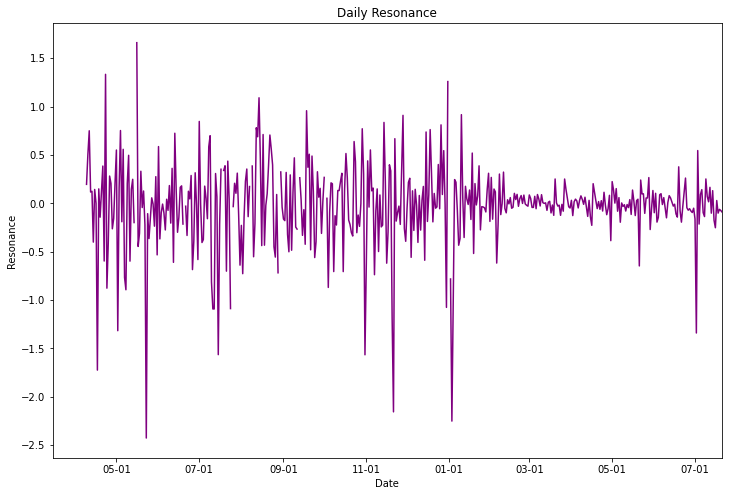

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

left = dt.date(2021, 3, 15)
right = dt.date.today()

ax.plot(davg.index.values,
       davg['Resonance'],
       color='purple',
       #linewidths=0
       )

ax.set(xlabel="Date",
       ylabel="Resonance",
       title="Daily Resonance")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set_xbound(left, right)